In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


llms = [ 
    "qwen2.5",  
]


examples = {
    "FIC" : "join_examples_dict_1", 
    "CIC" : 'join_examples_dict_2',
    "FSC" : 'vector_based_examples_dict_1',
    "CSC" : 'vector_based_examples_dict_2',
}

model_types = ['TF', 'FT', 'UN', 'IN']


def extract_model_type(model, suffix=""): 
    flag = True
    for ll in llms:
        if ll in model:
            flag = False
    if flag: 
        return "P1"
    elif ' U ' in model: 
        return f"UN{suffix}"
    elif ' ∩ ' in model: 
        return f"IN{suffix}"
    elif '-tf-p2' in model: 
        return "TF"
    elif '-ft-p2' in model: 
        return "FT"
    elif '-z-p2' in model: 
        return "ZS" 
    else: 
        return "P1"


import matplotlib.pyplot as plt
import numpy as np
def grouped_bar_chart(df, dataset):
    # Extract labels and metrics
    models = ['Only Matching', 'Clustering with Meta-Blocking', 'Clustering with SBERT']
    metrics = ["recall", "precision", "f1"]

    # Bar positions
    x = np.arange(len(models))  # positions for models
    width = 0.1           # width of each bar

    # Create plot
    fig, ax = plt.subplots(figsize=(10, 7))

    for i, metric in enumerate(metrics):
        ax.bar(x + i*width, df[metric], width, label=metric)

    # Formatting
    ax.set_xticks(x + width)  # center the ticks
    ax.set_xticklabels(models)
    ax.set_ylabel("Score")
    ax.set_title(f"Model Performance on {dataset}: Recall / Precision / F1")
    ax.legend()

    plt.show()


In [57]:
def results_extraction_main(candidate_pairs, suffix, weight = None): 
    datasets = ['D2', 'D5', 'D6', 'D7', 'D8']
    for dataset in datasets:
        
        print(f"Datset {dataset} table & figure")
        
        results = f'../results/{candidate_pairs}/{dataset}{suffix}.csv'
        results_ui = f'../results/{candidate_pairs}/{dataset}_ui.csv'
        
        results_ui = pd.read_csv(results_ui)
        results = pd.read_csv(results)
    
        cols = ["precision","recall","f1"]
        if suffix == '':
            for col in cols:
                results[col] = results[col] * 100
            
        for col in cols: 
            results_ui[col] = results_ui[col] * 100
    
        results_ui['model_type'] = results_ui['model'].apply(lambda x: extract_model_type(x, ""))
        results['model_type'] = results['model'].apply(lambda x: extract_model_type(x, ''))
        if weight: 
            results = results[results['weights_extracted_from'] == weight]
            results_ui = results_ui[results_ui['weights_extracted_from'] == weight]
        
        if candidate_pairs != 'original':
            results = results[(results['model_type'] != 'P1') & (results['model_type'] != 'IN')]
            results_ui = results_ui[(results_ui['model_type'] != 'P1')]
            results = pd.concat([results,results_ui])
        else:         
            results = results[(results['model_type'] != 'P1')] 
            

        results = results[(results['examples'] == examples['FSC']) & (results['model_type'] == 'UN')]
        display(results[['precision', 'recall', 'f1']])
        grouped_bar_chart(results, dataset)
        # groupby = results.groupby(by=['model_type', 'examples'])


        

        # groups = {"ZS" : groupby.get_group(("ZS", "vector_based_examples_dict_1"))['f1'].mean()}    


        # for model in model_types: 
        #     for key in examples: 
        #         groups[f'{key}-{model}'] = groupby.get_group((model, examples[key]))['f1'].mean()


        # # groups
        # df_plot_show(groups)


# Standard Blocking Only Matching Results

Datset D2 table & figure


,precision,recall,f1
62,89.826840,90.021692,89.924160
16,95.600476,87.201735,91.208168
18,97.362110,88.069414,92.482916


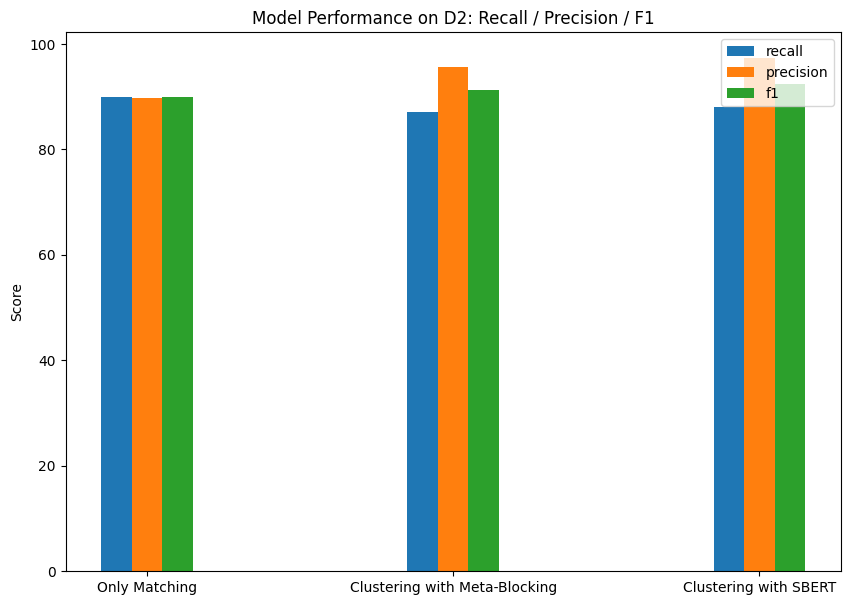

Datset D5 table & figure


,precision,recall,f1
62,80.467675,96.481583,87.750000
16,83.647799,95.052226,88.986104
18,84.937028,92.688290,88.643533


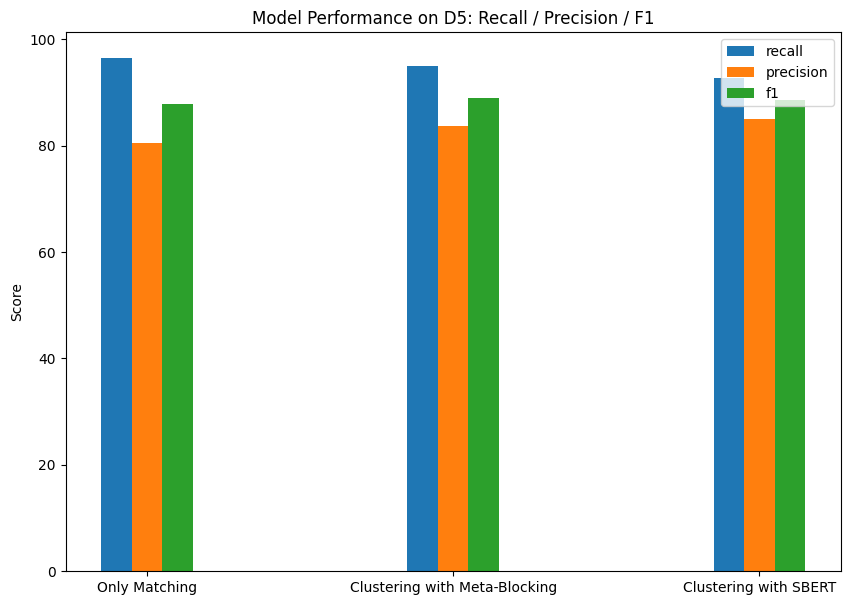

Datset D6 table & figure


,precision,recall,f1
62,59.059829,77.120536,66.892546
16,64.235764,71.763393,67.791249
18,68.658281,73.102679,70.810811


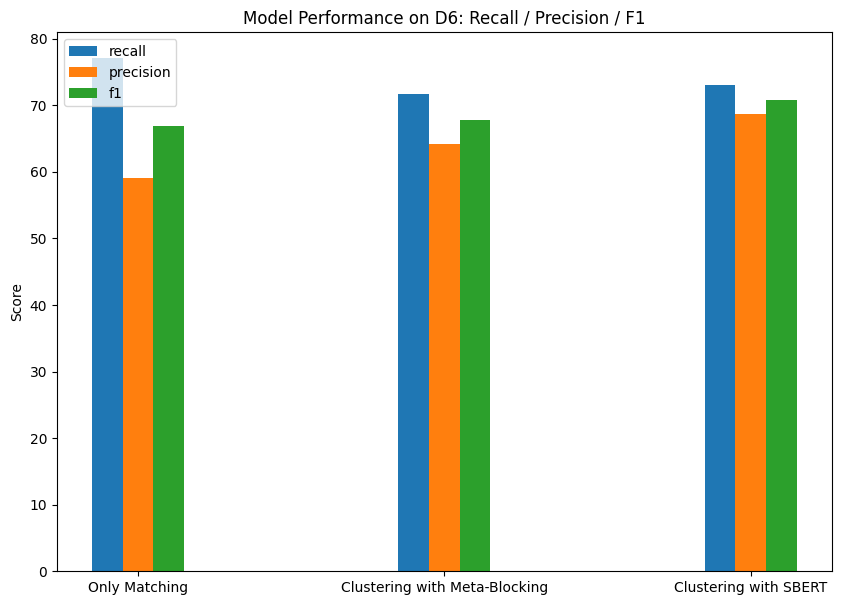

Datset D7 table & figure


,precision,recall,f1
62,43.803904,98.872951,60.710915
16,50.084128,91.495902,64.733599
18,54.634994,96.618852,69.800148


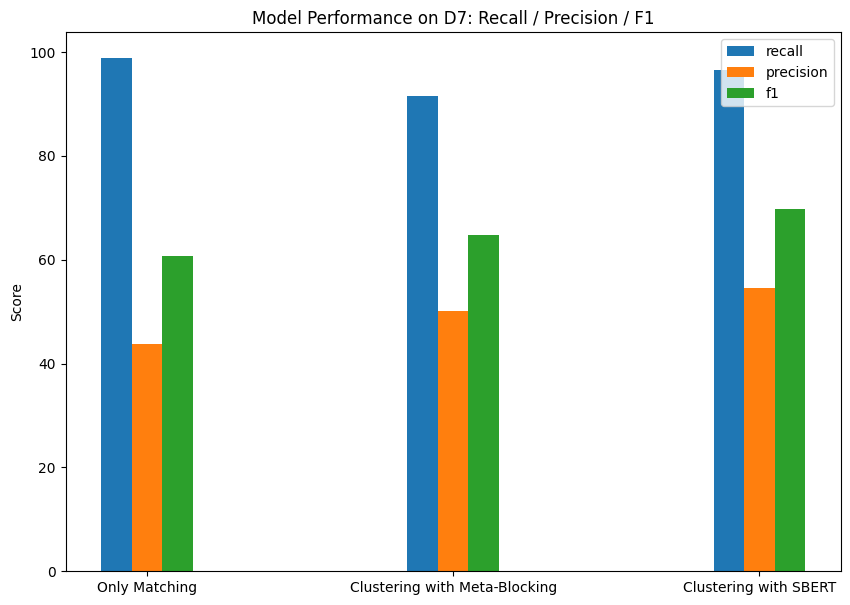

Datset D8 table & figure


,precision,recall,f1
62,55.423883,81.392236,65.943601
16,65.848214,78.982597,71.819842
18,66.854566,79.384203,72.582619


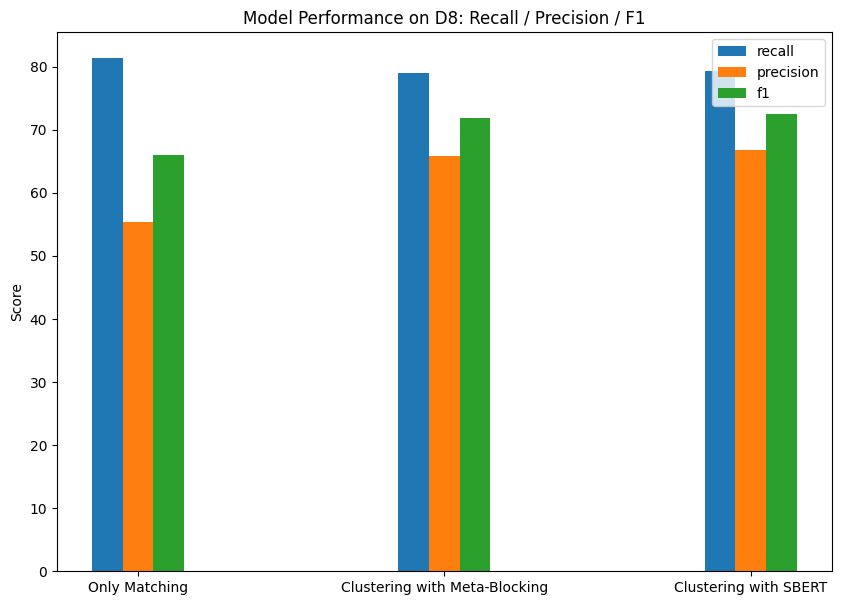

In [58]:

candidate_pairs = 'standard_blocking'
results_extraction_main(candidate_pairs, '')
